In [2]:
import sys
sys.path.append(sys.path[0] + '/../cpp/bin')

import PyMorpionSolitaire

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from random import randrange
from tqdm import tqdm

In [4]:
seed_game = PyMorpionSolitaire.Game5T('c')

In [5]:
def one_game(game):
    game.restart()
    game.playAtRandom()
    revert_number = randrange(5)
    if revert_number > 0:
        game.undo(revert_number)
    depth = game.exploreDepth(5)
    if depth > 4:
        return one_game(game)
    grid = game.image()[48:144, 48:144]
    score = game.getScore()
    number_of_moves = game.getNumberOfMoves()
    return grid, score, number_of_moves, depth

In [6]:
def one_batch(game, batch_size = 200):
    grids, scores, moves, depths = list(zip(*[one_game(game) for _ in range(batch_size)]))
    return np.array(grids), np.array(scores), np.array(moves), np.array(depths)

# Analyze one big batch

In [7]:
grids, scores, moves, depths = one_batch(seed_game, 10000)

In [8]:
def plot_histogram(data, xlabel = "", ylabel = "Count", **kwargs):
    bins = [n - 0.5 for n in range(max(data) + 2)]
    count, bins = np.histogram(data, bins=bins)
    plt.step(bins, np.insert(count, 0, 0),  **kwargs)
    plt.xlim((-0.5, max(data) + 0.5))
    plt.ylim(0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

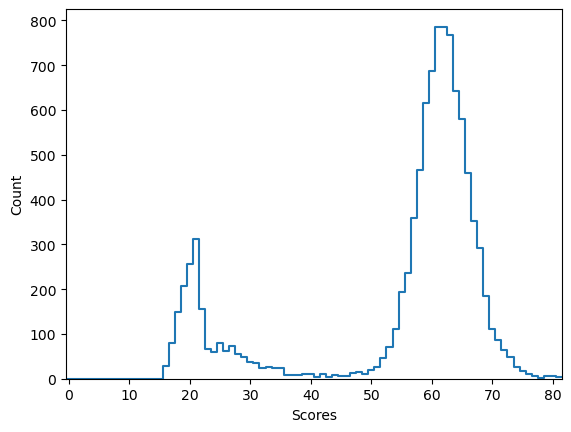

In [9]:
plot_histogram(scores, "Scores")

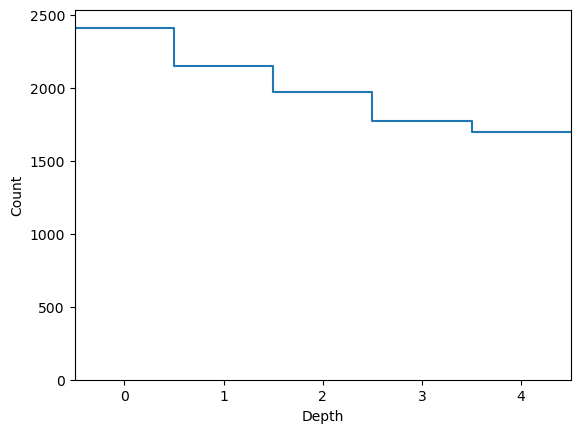

In [10]:
plot_histogram(depths, "Depth")

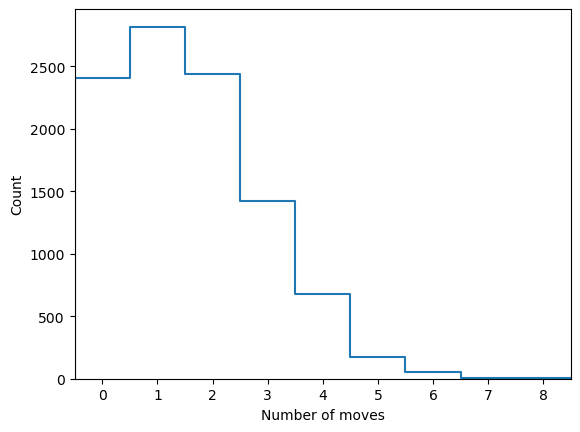

In [11]:
plot_histogram(moves, "Number of moves")

In [14]:
depth_and_move = np.array([depths, moves]).transpose()

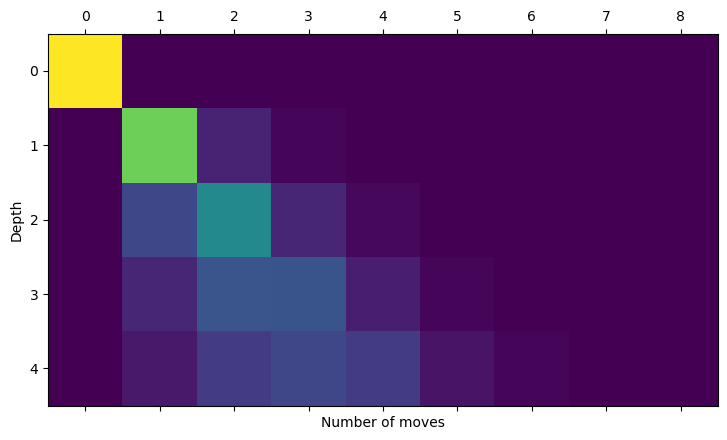

In [16]:
count = np.zeros((5, moves.max() + 1))

for (depth, move) in depth_and_move:
    count[depth, move] += 1

plt.matshow(count)
plt.xlabel('Number of moves')
plt.ylabel('Depth')
plt.show()

In [17]:
depth_value, depth_count = np.unique(depths, return_counts=True)
depth_value, depth_count

(array([0, 1, 2, 3, 4]), array([2410, 2151, 1972, 1769, 1698]))

In [18]:
depth_and_move_value, depth_and_move_count = np.unique(depth_and_move, axis=0, return_counts=True)
depth_and_move_value, depth_and_move_count

(array([[0, 0],
        [1, 1],
        [1, 2],
        [1, 3],
        [1, 4],
        [2, 1],
        [2, 2],
        [2, 3],
        [2, 4],
        [2, 5],
        [3, 1],
        [3, 2],
        [3, 3],
        [3, 4],
        [3, 5],
        [3, 6],
        [4, 1],
        [4, 2],
        [4, 3],
        [4, 4],
        [4, 5],
        [4, 6],
        [4, 7],
        [4, 8]]),
 array([2410, 1875,  243,   30,    3,  521, 1135,  257,   55,    4,  257,
         634,  628,  206,   37,    7,  164,  430,  510,  416,  129,   43,
           4,    2]))

In [22]:
depth_and_move_value[16], depth_and_move_count[16] / depth_and_move_count.sum()

(array([4, 1]), 0.0164)

53 65 1 4


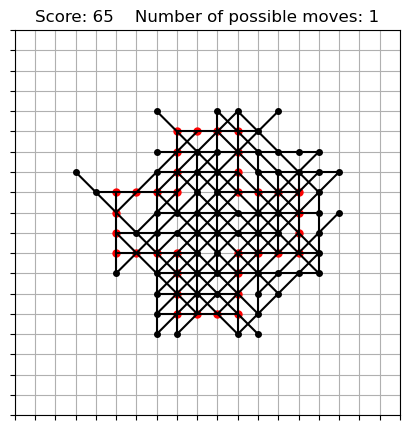

In [24]:
for i in range(100000):
    grid, score, move, depth = one_game(seed_game)
    if depth == 4 and move == 1:
        break

print(i, score, move, depth)
seed_game.print()

# Store data

In [15]:
for i in tqdm(range(0,10000)):
    grids, scores, moves, depths = one_batch(seed_game)
    np.save("data_max_4/grids_%05d.npy" % i, grids)
    np.save("data_max_4/scores_%05d.npy" % i, scores)
    np.save("data_max_4/depths_%05d.npy" % i, depths)

100%|█████████████████████████████████████| 10000/10000 [03:58<00:00, 41.88it/s]


Compress the data using the following commands in a terminal:

`cd <repo>/deeplearning`

`tar -czf data_max_4.tar.gz data_max_4`